data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# Step #1:IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
reviews_df = pd.read_csv('/content/amazon_reviews .csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# View the DataFrame Information
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# View DataFrame Statistical Summary
reviews_df.describe()


,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# Step #2: PERFORM DATA VISUALIZATION

<Axes: >

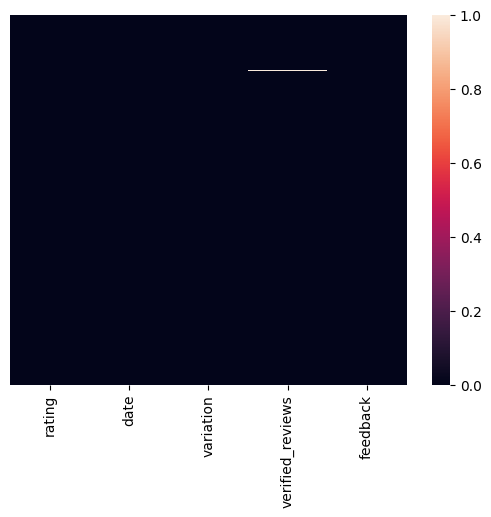

In [5]:
sns.heatmap(reviews_df.isnull(), yticklabels=False)

<Axes: xlabel='rating', ylabel='count'>

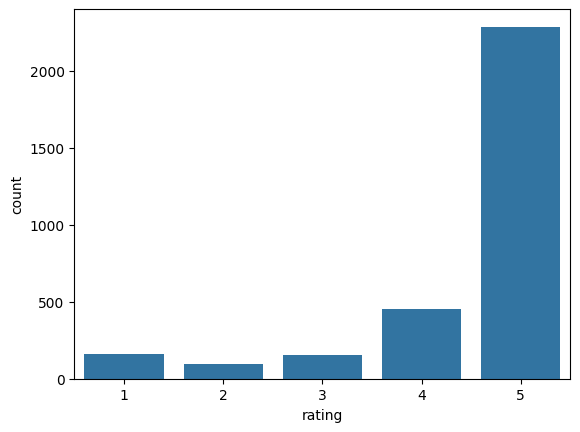

In [6]:
# Plot the count plot for the ratings
sns.countplot(x=reviews_df['rating'])

# Step #3: PERFORM DATA EXPLORATION

In [7]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(lambda x: len(str(x)))

In [8]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

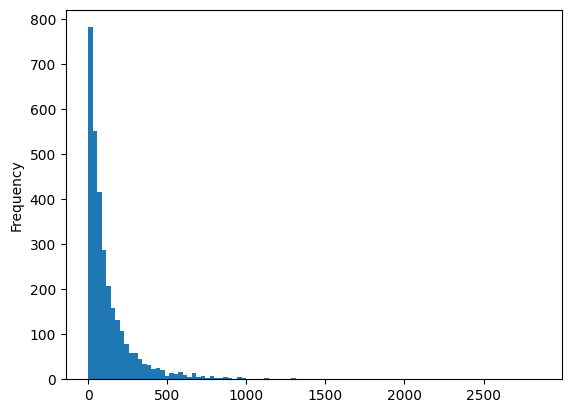

In [9]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100,kind = 'hist')

In [10]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049206
std,1.068506,0.273778,182.100176
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [11]:
# Let's see the longest message
reviews_df[reviews_df['length']==2851.000000]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [12]:
reviews_df[reviews_df['length']==2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [13]:
reviews_df[reviews_df['length']==132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

# Step #4: PLOT THE WORDCLOUD

In [14]:
# Obtain only the positive reviews
positive = reviews_df[ reviews_df['feedback']==1 ]

In [15]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [16]:
# Obtain the negative reviews only
negative = reviews_df[ reviews_df['feedback']==0 ]

In [17]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [18]:
# Convert to list format
sentences=positive['verified_reviews'].tolist()
len(sentences)

2893

In [19]:
# Join all reviews into one large string
sentences_as_one_string = ''.join(sentences)

In [20]:
sentences_as_one_string

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

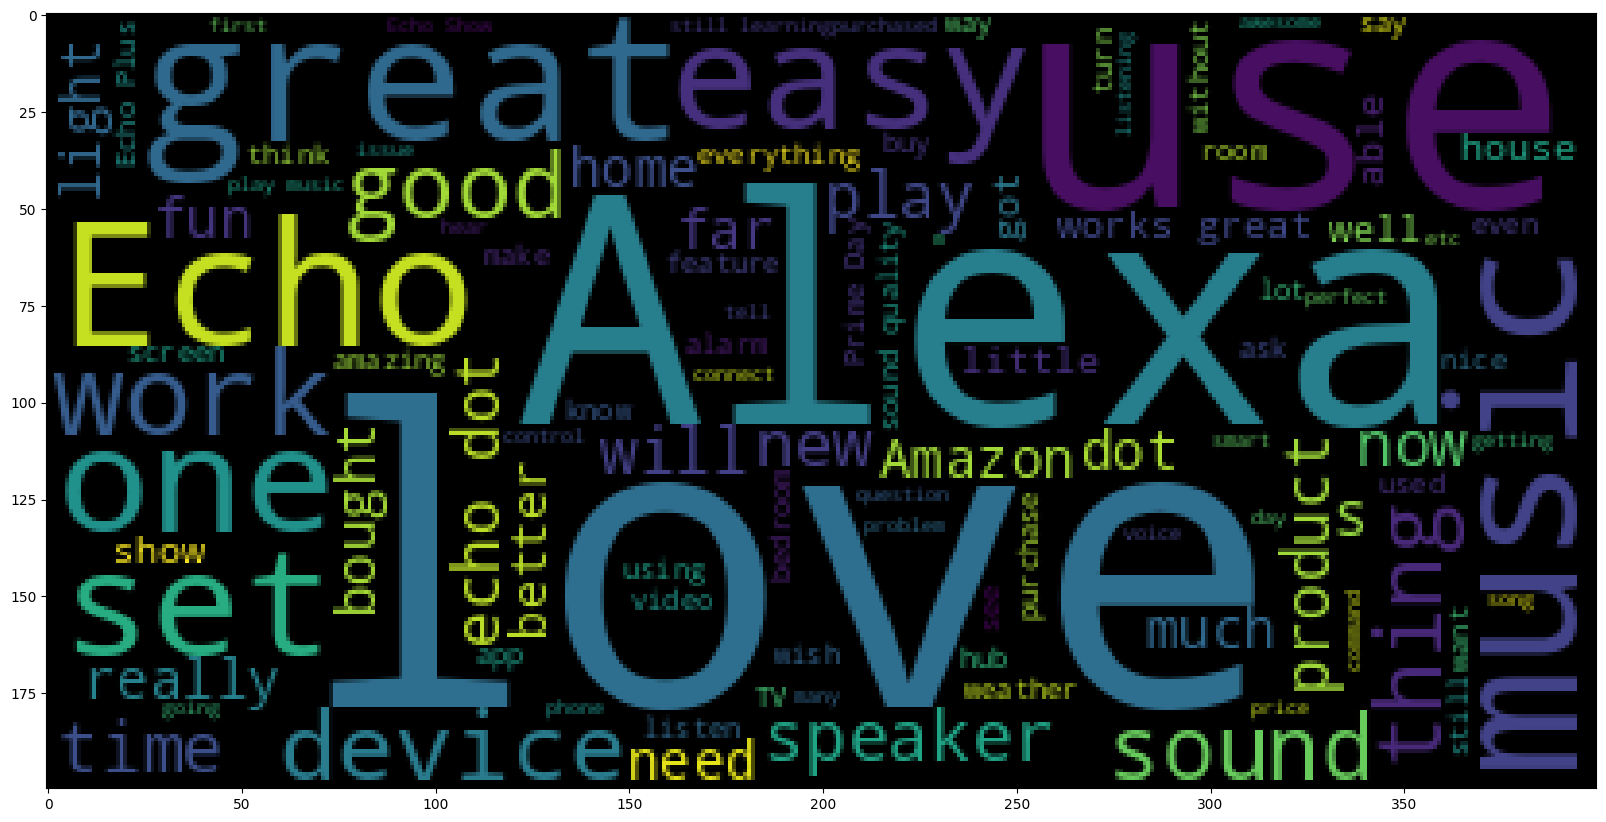

In [21]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# Step #5: TEXT DATA CLEANING 101

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
Test = '$I Love  # Liu  * University ?  Nlp DR  Ali Ballout ...!!!!'

In [28]:
Test_punc_removed=[ char  for char in Test  if char not in string.punctuation  ]
Test_punc_removed

['I',
 ' ',
 'L',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 ' ',
 'L',
 'i',
 'u',
 ' ',
 ' ',
 ' ',
 'U',
 'n',
 'i',
 'v',
 'e',
 'r',
 's',
 'i',
 't',
 'y',
 ' ',
 ' ',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 's',
 ' ',
 'N',
 'l',
 'p',
 ' ',
 'M',
 'h',
 'm',
 'd',
 ' ',
 'B',
 'a',
 'l',
 'l',
 'o',
 'u',
 't',
 ' ']

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I Love   Liu   University   Projects Nlp Mhmd Ballout '

In [31]:
import nltk # Natural Language tool kit

In [32]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI guided Projects on Rhyme and Coursera'

In [34]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [35]:
Test_punc_removed_join_clean

['enjoying',
 'coding,',
 'programming',
 'AI',
 'guided',
 'Projects',
 'Rhyme',
 'Coursera']

# Step #6: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [52]:

# Print the feature names
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [53]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# Step #7: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [65]:
import string
from nltk.corpus import stopwords

def message_cleaning(message):
    if isinstance(message, str):  # Check if message is a string
        Test_punc_removed = [char for char in message if char not in string.punctuation]
        Test_punc_removed_join = ''.join(Test_punc_removed)
        Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
        return Test_punc_removed_join_clean
    else:
        return []  # Return an empty list if message is not a string

# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)



In [66]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [67]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np  # Import numpy for handling NaN values

# Define the cleaning pipeline
vectorizer = CountVectorizer(analyzer=message_cleaning)

# Fill NaN values with an empty string
reviews_df['verified_reviews'].fillna('', inplace=True)

# Fit and transform the data
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

feature_names = list(vectorizer.vocabulary_.keys())
print(feature_names)




['Love', 'Echo', 'Loved', 'Sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'Alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'play', 'games', 'categories', 'nice', 'sound', 'music', 'well', 'Music', 'received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else', 'Without', 'cellphone', 'cannot', 'use', 'many', 'features', 'iPad', 'great', 'alarm', 'u', 'r', 'almost', 'deaf', 'hear', 'bedroom', 'living', 'room', 'reason', 'enough', 'keep', 'herIt', 'ask', 'random', 'questions', 'response', 'seem', 'smartbon', 'politics', 'yet', 'think', '5th', 'one', 'Ive', 'purchased', 'Im', 'working', 'getting', 'every', 'house', 'really', 'offer', 'specifily', 'Echos', 'controlling', 'throughout', 'looks', 'I’ve', 'listened', 'songs', 'haven’t', 'heard', 'since', 'childho

In [71]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
reviews_countvectorizer.shape

(3150, 5211)

In [73]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [74]:
X = reviews

In [75]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

**MINI CHALLENGE #7:**
- **What is the shape of X and Y**

In [77]:
X.shape

(3150, 5211)

In [78]:
y.shape


(3150,)

# Step #8: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
NB_classifier = MultinomialNB()

# Fit the classifier to the training data
NB = NB_classifier.fit(X_train, y_train)


![image.png](attachment:image.png)

<Axes: >

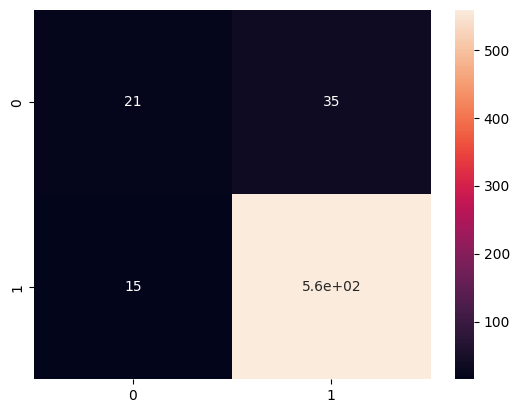

In [86]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the Multinomial Naive Bayes classifier
NB_classifier = MultinomialNB()

# Fit the classifier to the training data
NB = NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predict_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True)


In [87]:
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.58      0.38      0.46        56
           1       0.94      0.97      0.96       574

    accuracy                           0.92       630
   macro avg       0.76      0.67      0.71       630
weighted avg       0.91      0.92      0.91       630



**MINI CHALLENGE #8:**
- **Train a logistic Regression classifier and assess its performance**

              precision    recall  f1-score   support

           0       0.87      0.36      0.51        56
           1       0.94      0.99      0.97       574

    accuracy                           0.94       630
   macro avg       0.91      0.68      0.74       630
weighted avg       0.93      0.94      0.93       630



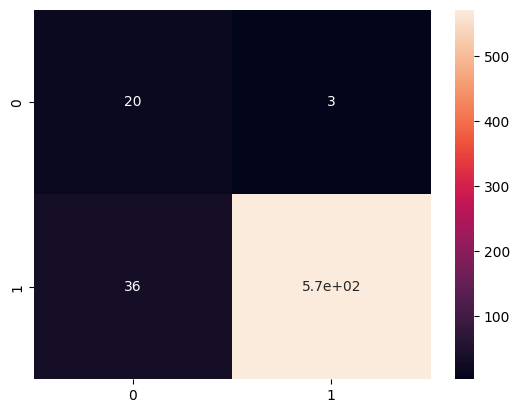

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))